# Exploratory Data Analysis (EDA) Use Case

This file contains answers for EDA Use Case of Home Credit Indonesia Data Science Bootcamp 2019 in IYKRA

Author: Nirta Ika Yunita
<br>Date: 2019, October 29</br>

## Bank Marketing

**Data Set Information:** 
<br>The data is collected from a marketing campaign of a banking institution. The marketing campaigns were done on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.</br>

### Input variables

#### Bank client data:
 - age (numeric)
 - job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
 - marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
 - education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
 - default: has credit in default? (categorical: 'no', 'yes', 'unknown')
 - housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
 - loan: has personal loan? (categorical: 'no', 'yes', 'unknown')


#### Related with the last contact of the current campaign:
 - contact: contact communication type (categorical: 'cellular', 'telephone')
 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
 - day_of_week: last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')
 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration = 0 then y = 'no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### Other attributes:
 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
 - previous: number of contacts performed before this campaign and for this client (numeric)
 - poutcome: outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')

#### Social and economic context attributes:
 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
 - cons.price.idx: consumer price index - monthly indicator (numeric)
 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
 - euribor3m: euribor 3 month rate - daily indicator (numeric)
 - nr.employed: number of employees - quarterly indicator (numeric)

#### Output variable (desired target):
 - y - has the client subscribed a term deposit? (binary: 'yes','no')
 
### Data source
Dataset from: https://drive.google.com/drive/folders/1nJ70bQb6_7yurTvlzzwNpgQJQmTMjs7R?usp=sharing

## Questions

1\. Describe each columns (data types, unique values/range of values, missing values, etc.)
<br> 2\. Is the data fit for analysis? If not, what wrangling steps should be done?
<br> 3\. From the data, what can you describe about their sample of customers?
<br> 4\. Are they potentially “lucrative” customers? If so, how many of them are and why?
<br> 5\. What are the difference between customers who are interested in the product and those who don’t?

## Load Data

In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd

# matplotlib, seaborn, and plotly for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# math
import math

# Define class
class color:
   BLUE = '\033[94m'
   END = '\033[0m'

In [2]:
# Load data
data = pd.read_csv('bank-marketing-full.csv', sep = ';')

data = data.replace([np.inf, -np.inf], np.nan)

In [3]:
# Data shape
row = data.shape[0]
column = data.shape[1]

print("Number of rows reflected on dataset are " + color.BLUE + str(row) + color.END + ".") 
print("Number of columns reflected on dataset are " + color.BLUE + str(column) + color.END + ".") 

data.head()

Number of rows reflected on dataset are 41188.
Number of columns reflected on dataset are 21.


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# Summary of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

From the code above, we know that there are **5 columns with type float64**, **5 columns with type int64**, and **11 columns with type object**.

In [5]:
# Columns type
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [6]:
numerical_data = data.select_dtypes(include = [np.number]).columns
categorical_data = data.select_dtypes(exclude = [np.number]).columns

In [7]:
numerical_data

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [8]:
categorical_data

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

Columns with type float64 and int64 are grouped as numerical data. Columns with type object are grouped as categorical data.

In [9]:
# Description for numerical data
data[numerical_data].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [10]:
# Description for categorical data
data[categorical_data].describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


## Handling Missing and Duplicated Data

In [11]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

From the code above, it is shown that there is no missing data for all columns. But, from the description, some of columns have value **'unknown'**, so later we must check the unique value.

In [12]:
duplicatedRows = data[data.duplicated()]

In [13]:
print("Duplicated rows except first occurrence based on all columns are :")
duplicatedRows

Duplicated rows except first occurrence based on all columns are :


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


There are 12 duplicated rows except the first occurence based on all columns. We need to drop duplicated rows.

In [14]:
data.drop_duplicates(inplace=True)

12 duplicated rows have been dropped.

In [15]:
# Data shape after drop duplicated rows
row = data.shape[0]
column = data.shape[1]

print("Number of rows after drop duplicated rows are " + color.BLUE + str(row) + color.END + ".") 
print("Number of columns after drop duplicated rows are " + color.BLUE + str(column) + color.END + ".") 

data.head()

Number of rows after drop duplicated rows are 41176.
Number of columns after drop duplicated rows are 21.


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [16]:
data['y'].value_counts()
data['y'].value_counts(normalize = True)

no     0.887337
yes    0.112663
Name: y, dtype: float64

Only 11% of bank's customers will say yes to the offer.

In [17]:
# Add boolean columns for attribute 'y'
data = pd.concat([data,pd.get_dummies(data['y'], prefix = 'bool')], axis = 1)

data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,bool_no,bool_yes
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,0


## Bank Client Data

First, we explore attributes that related to bank client data (age, job, marital, education, default, housing, and loan).

In [18]:
client_data = data.iloc[:, 0:7]
client_data.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


### Unique values of categorial variables

In [19]:
# Knowing unique value of each categorical variables from bank client data
print("Unique value of " + color.BLUE + "'job'" + color.END + " column are:\n", client_data['job'].unique())
print("\nUnique value of " + color.BLUE + "'marital'" + color.END + " column are:\n", client_data['marital'].unique())
print("\nUnique value of " + color.BLUE + "'education'" + color.END + " column are:\n", client_data['education'].unique())
print("\nUnique value of " + color.BLUE + "'default'" + color.END + " column are:\n", client_data['default'].unique())
print("\nUnique value of " + color.BLUE + "'housing'" + color.END + " column are:\n", client_data['housing'].unique())
print("\nUnique value of " + color.BLUE + "'loan'" + color.END + " column are:\n", client_data['loan'].unique())

Unique value of 'job' column are:
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

Unique value of 'marital' column are:
 ['married' 'single' 'divorced' 'unknown']

Unique value of 'education' column are:
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

Unique value of 'default' column are:
 ['no' 'unknown' 'yes']

Unique value of 'housing' column are:
 ['no' 'yes' 'unknown']

Unique value of 'loan' column are:
 ['no' 'yes' 'unknown']


### Analysis per attribute

#### Age

In [20]:
client_data[['age']].describe()

,age
count,41176.00000
mean,40.02380
std,10.42068
min,17.00000
25%,32.00000
50%,38.00000
75%,47.00000
max,98.00000


The maximum value of age is 98 years old.
<br> The minimum value of age is 17 years old.
<br> The average value of age is 40 years old.
<br> The median value of age is 38 years old.
<br> The standard deviation value of age is 10.42.

In [21]:
# Outliers = Q3 + 1.5 * IQR
outliers = client_data['age'].quantile(q = 0.75) + 1.5*(client_data['age'].quantile(q = 0.75) - client_data['age'].quantile(q = 0.25))
print("The age above " + str(outliers) + " years old is outliers.")

o = client_data[client_data['age'] > outliers]['age'].count()
n = client_data.shape[0]
perc_out = round(o*100/n, 2)

print("The number of outliers is " + str(o) + ".")
print("The outliers percentage is " + str(perc_out) + "%.")

The age above 69.5 years old is outliers.
The number of outliers is 468.
The outliers percentage is 1.14%.


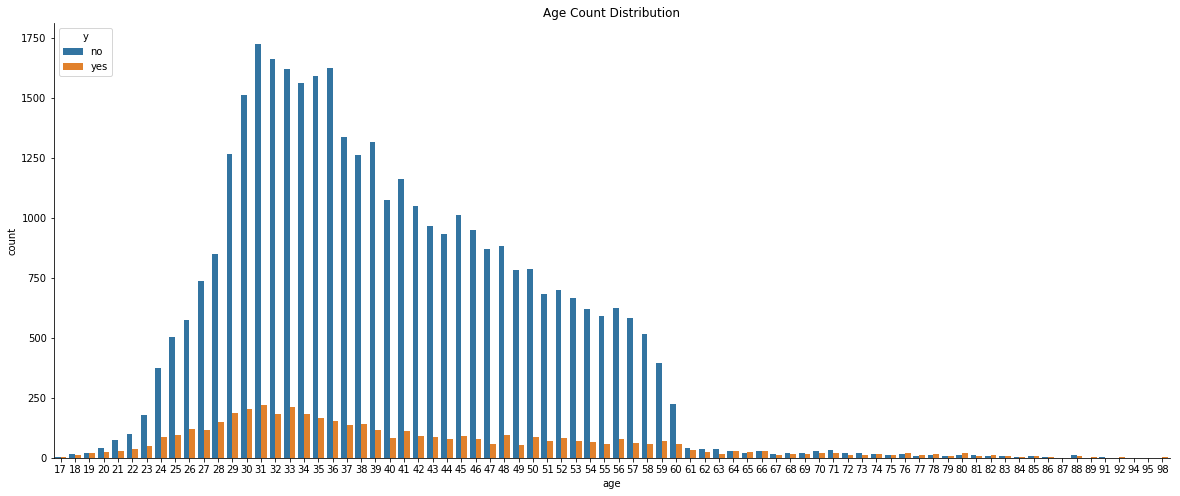

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(data = data, x = 'age', hue = 'y')
ax.set_title('Age Count Distribution')
sns.despine()

#### Job

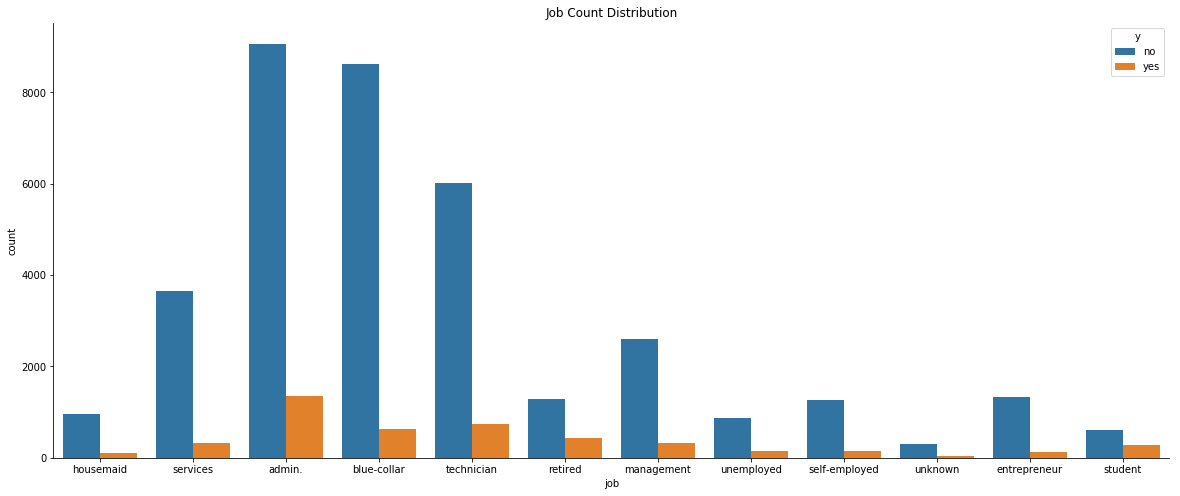

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(data = data, x = 'job', hue = 'y')
ax.set_title('Job Count Distribution')
sns.despine()

The top 3 jobs of bank's customers are **admin.**, **blue collar**, and **technician**. All of jobs more likely to say no to the marketing campaign.

#### Marital

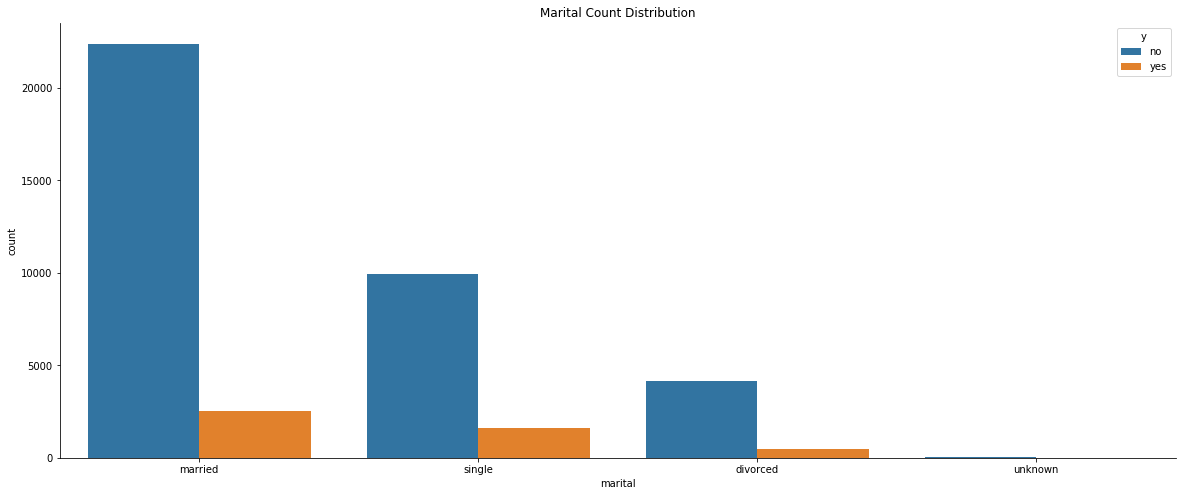

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(data = data, x = 'marital', hue = 'y')
ax.set_title('Marital Count Distribution')
sns.despine()

The married customers are dominating the marital distribution. 'unknown' value in this attribute need to be removed.

#### Education

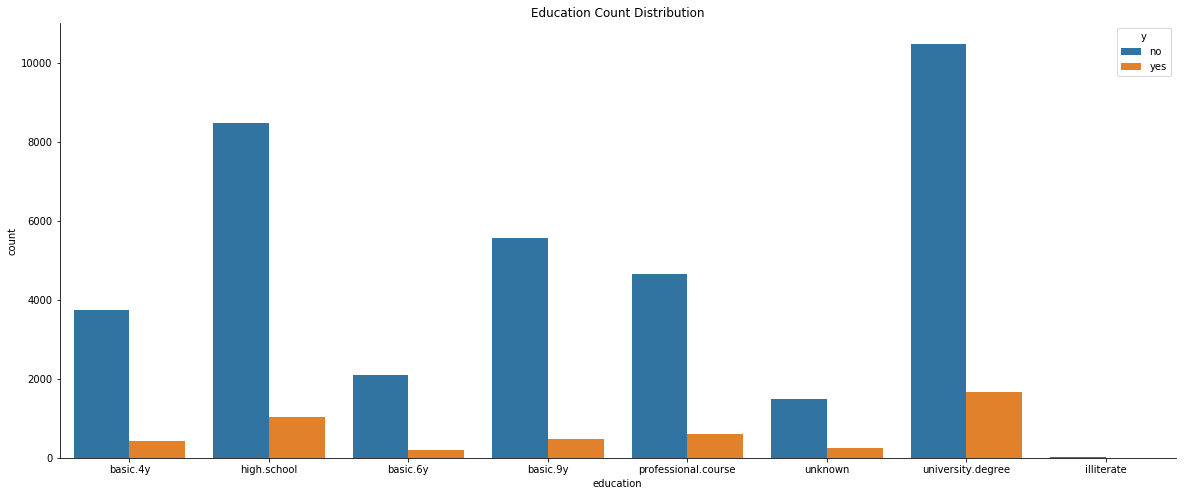

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(data = data, x = 'education', hue = 'y')
ax.set_title('Education Count Distribution')
sns.despine()

The top 3 of customer's latest education are **university degree**, **high school**, and **basic 9y**.

#### Default

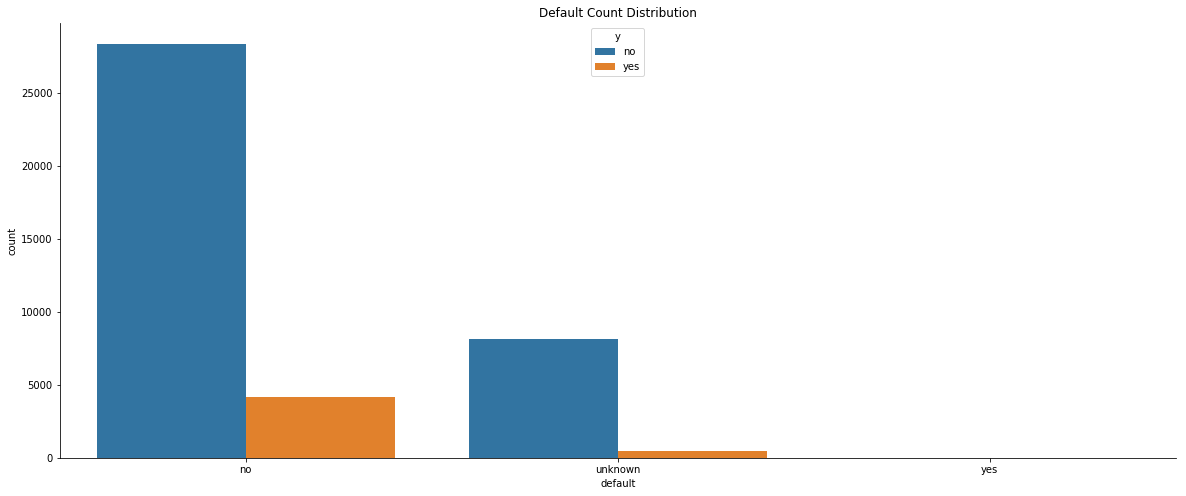

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(data = data, x = 'default', hue = 'y')
ax.set_title('Default Count Distribution')
sns.despine()

'unkown' value in this attribute need to be removed. But, there will only remain 'no' value and little number of 'yes' value. So, it needs to be explored more.

#### Housing

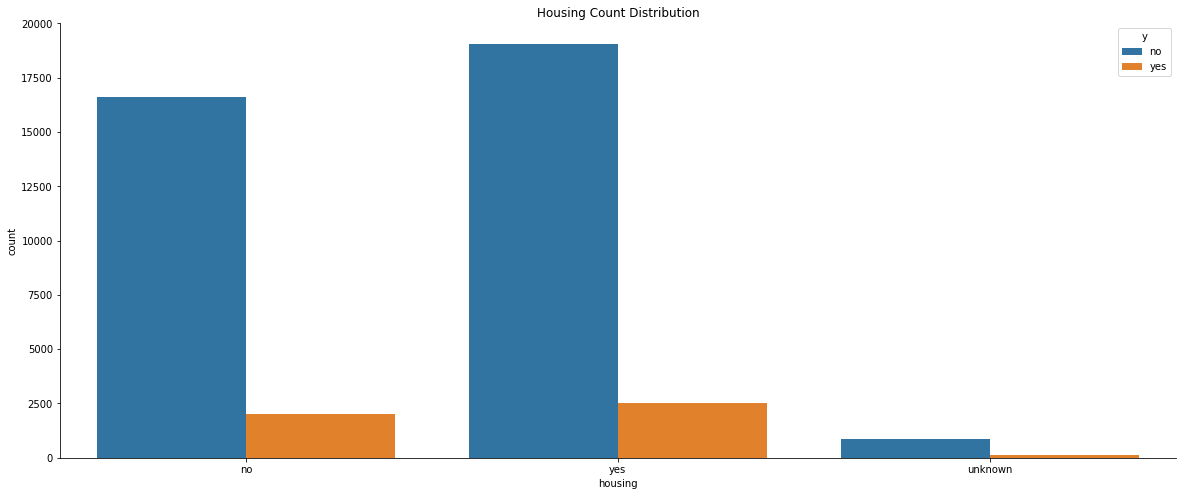

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(data = data, x = 'housing', hue = 'y')
ax.set_title('Housing Count Distribution')
sns.despine()

The distribution of customers that have house and do not have house is almost the same. 'unkown' value in this attribute need to be removed.

#### Loan

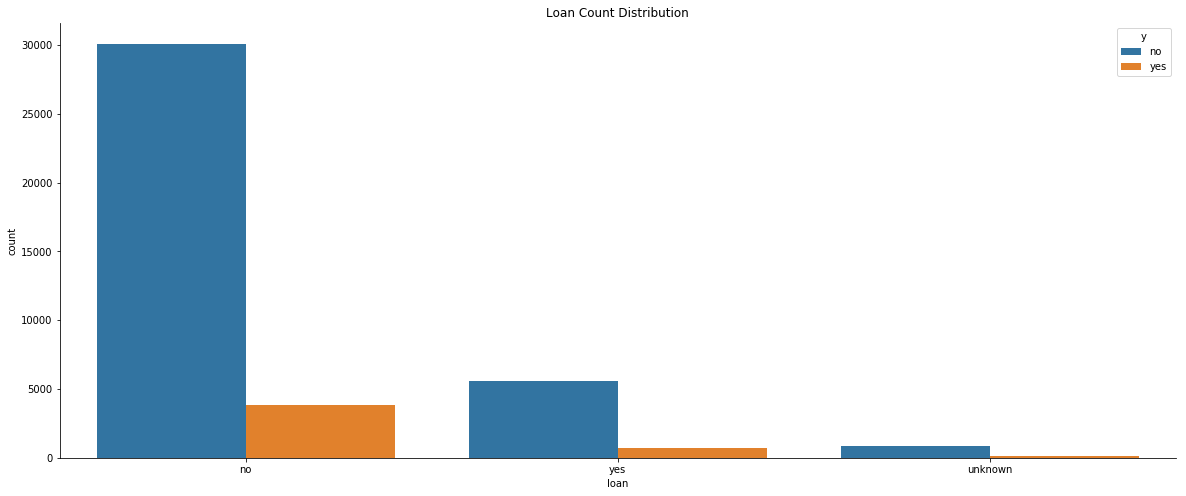

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(data = data, x = 'loan', hue = 'y')
ax.set_title('Loan Count Distribution')
sns.despine()

80% of the customer has no loan.
So many 'unkown' value in this attribute.

## Related with The Last Contact of The Current Campaign
Second, we explore attributes that related to last contact of the current campaign (contact, month, day_of_week, and duration).

In [29]:
curr_camp = data.iloc[:, 7:11]
curr_camp.head()

,contact,month,day_of_week,duration
0,telephone,may,mon,261
1,telephone,may,mon,149
2,telephone,may,mon,226
3,telephone,may,mon,151
4,telephone,may,mon,307


### Unique values of categorical variables

In [30]:
# Knowing unique value of each categorical variables from last contact of the current campaign
print("Unique value of " + color.BLUE + "'contact'" + color.END + " column are:\n", curr_camp['contact'].unique())
print("\nUnique value of " + color.BLUE + "'month'" + color.END + " column are:\n", curr_camp['month'].unique())
print("\nUnique value of " + color.BLUE + "'day_of_week'" + color.END + " column are:\n", curr_camp['day_of_week'].unique())

Unique value of 'contact' column are:
 ['telephone' 'cellular']

Unique value of 'month' column are:
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Unique value of 'day_of_week' column are:
 ['mon' 'tue' 'wed' 'thu' 'fri']


### Analysis per attribute

#### Contact

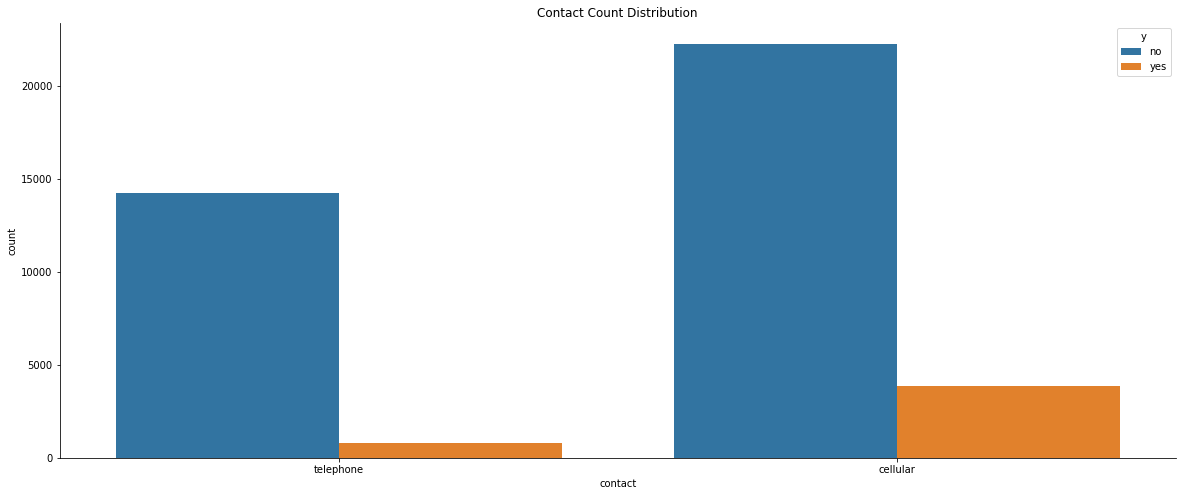

In [31]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(data = data, x = 'contact', hue = 'y')
ax.set_title('Contact Count Distribution')
sns.despine()

Bank's customers more likely to be contacted via cellular.

#### Month

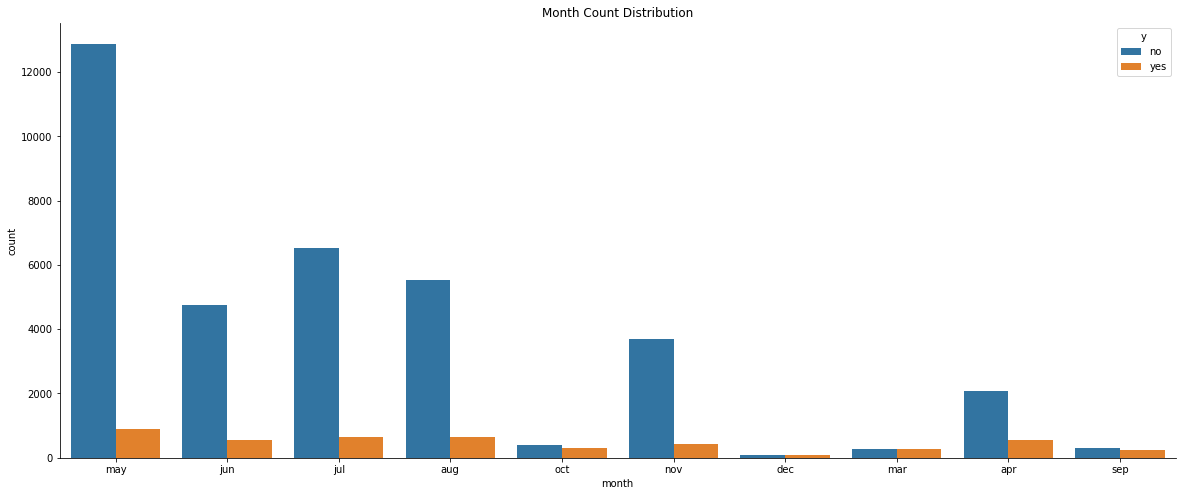

In [32]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(data = data, x = 'month', hue = 'y')
ax.set_title('Month Count Distribution')
sns.despine()

#### Day_of_week

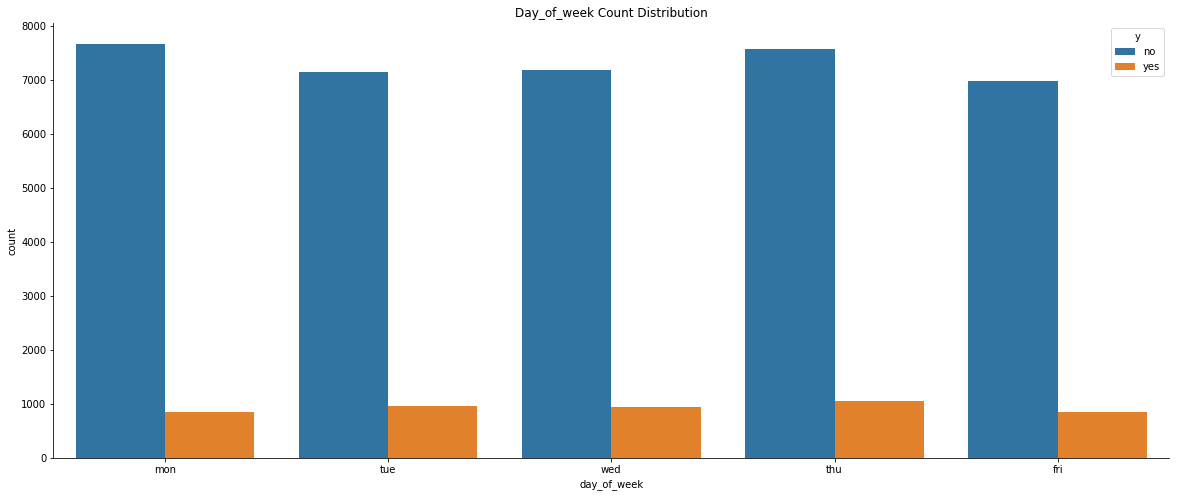

In [33]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(data = data, x = 'day_of_week', hue = 'y')
ax.set_title('Day_of_week Count Distribution')
sns.despine()

There is no campaign on weekend. We can see that through weekdays, the marketing campaign distribution is equal.

#### Duration

In [34]:
curr_camp[['duration']].describe()

,duration
count,41176.000000
mean,258.315815
std,259.305321
min,0.000000
25%,102.000000
50%,180.000000
75%,319.000000
max,4918.000000


The maximum value of duration is 4918 seconds.
<br> The minimum value of duration is 0 seconds.
<br> The average value of duration is 258 seconds.
<br> The median value of duration is 180 seconds.
<br> The standard deviation value of duration is 259.

The minimum value of duration is 0. It means that the call is not answered or the client was not previously contacted. This attribute highly affects the output target (e.g., if duration = 0 then y = 'no'). To build a realistic model, we have drop this attribute.

In [35]:
# Outliers = Q3 + 1.5 * IQR
outliers = curr_camp['duration'].quantile(q = 0.75) + 1.5*(curr_camp['duration'].quantile(q = 0.75) - curr_camp['duration'].quantile(q = 0.25))
print("The duration above " + str(outliers) + " seconds is outliers.")

o = curr_camp[curr_camp['duration'] > outliers]['duration'].count()
n = curr_camp.shape[0]
perc_out = round(o*100/n, 2)

print("The number of outliers is " + str(o) + ".")
print("The outliers percentage is " + str(perc_out) + "%.")

The duration above 644.5 seconds is outliers.
The number of outliers is 2963.
The outliers percentage is 7.2%.


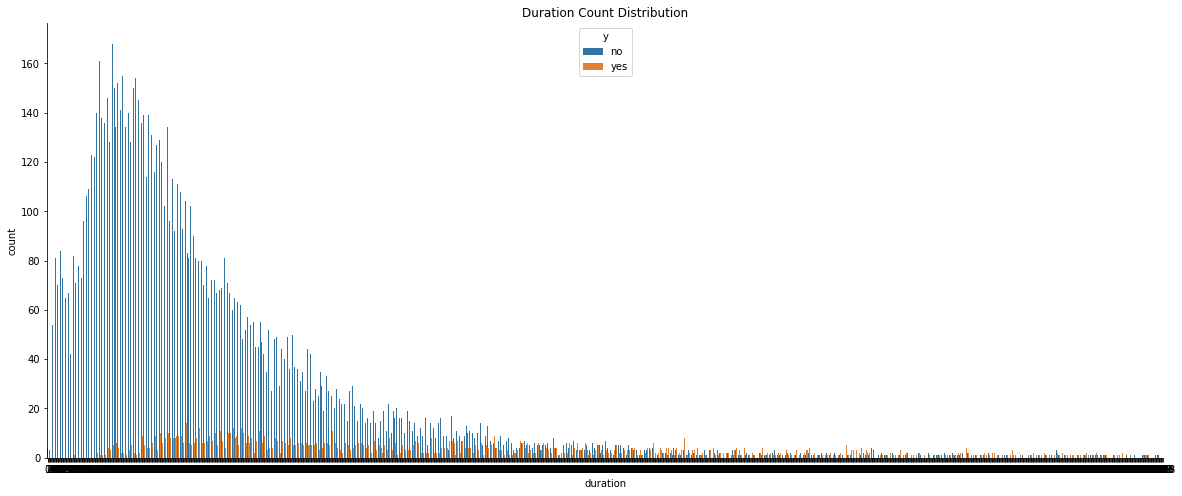

In [36]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(data = data, x = 'duration', hue = 'y')
ax.set_title('Duration Count Distribution')
sns.despine()

## Other Attributes
Third, we explore other attributes like campaign, pdays, previous, and poutcome.

In [37]:
other = data.iloc[:, 11:15]
other.head()

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent


### Unique values of categorical variables

In [38]:
# Knowing unique value of each categorical variables from other attributes
print("Unique value of " + color.BLUE + "'previous outcome'" + color.END + " column are:\n", other['poutcome'].unique())

Unique value of 'previous outcome' column are:
 ['nonexistent' 'failure' 'success']


### Analysis per attribute

#### Campaign

In [39]:
other[['campaign']].describe()

,campaign
count,41176.000000
mean,2.567879
std,2.770318
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,56.000000


The maximum value of campaign is 56.
<br> The minimum value of campaign is 1.
<br> The average value of campaign is 2.56.
<br> The median value of campaign is 2.
<br> The standard deviation value of campaign is 2.77.

In [40]:
# Outliers = Q3 + 1.5 * IQR
outliers = other['campaign'].quantile(q = 0.75) + 1.5*(other['campaign'].quantile(q = 0.75) - other['campaign'].quantile(q = 0.25))
print("The campaign above " + str(outliers) + " is outliers.")

o = other[other['campaign'] > outliers]['campaign'].count()
n = other.shape[0]
perc_out = round(o*100/n, 2)

print("The number of outliers is " + str(o) + ".")
print("The outliers percentage is " + str(perc_out) + "%.")

The campaign above 6.0 is outliers.
The number of outliers is 2406.
The outliers percentage is 5.84%.


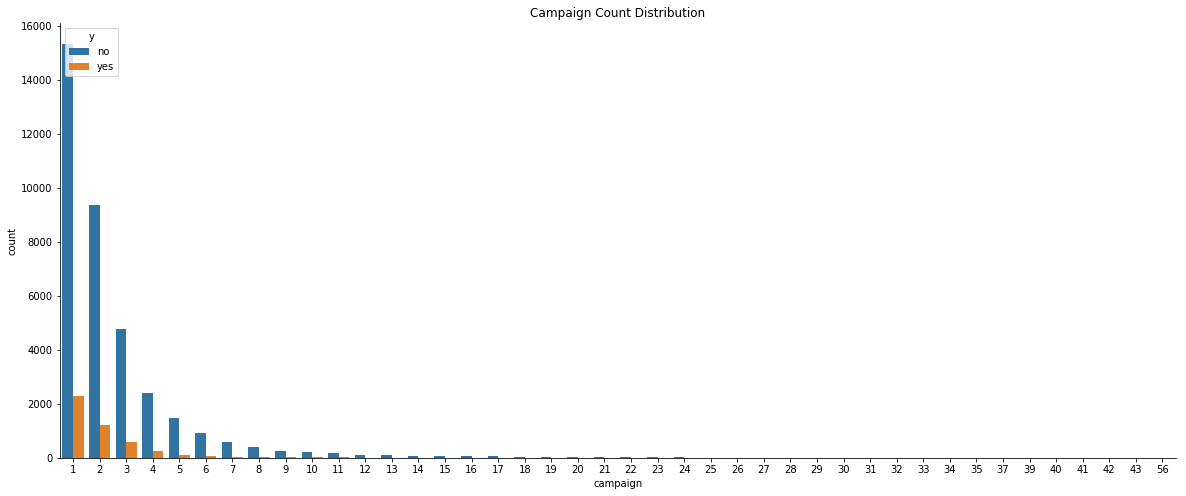

In [41]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(data = data, x = 'campaign', hue = 'y')
ax.set_title('Campaign Count Distribution')
sns.despine()

Most of bank customers are not in the previous campaign.

#### Pdays

In [42]:
other[['pdays']].describe()

,pdays
count,41176.000000
mean,962.464810
std,186.937102
min,0.000000
25%,999.000000
50%,999.000000
75%,999.000000
max,999.000000


The maximum value of previous days is 999 days.
<br> The minimum value of previous days is 0 days.
<br> The average value of previous days is 962 days.
<br> The median value of previous days is 999 days.
<br> The standard deviation value of previous days is 186.9.

There is '999' value which means the client was not previously contacted. This value needs to be removed so it can give us a better distribution.

In [43]:
# Outliers = Q3 + 1.5 * IQR
outliers = other['pdays'].quantile(q = 0.75) + 1.5*(other['pdays'].quantile(q = 0.75) - other['pdays'].quantile(q = 0.25))
print("The previous days (before removing 999) above " + str(outliers) + " days is outliers.")

o = other[other['pdays'] > outliers]['pdays'].count()
n = other.shape[0]
perc_out = round(o*100/n, 2)

print("The number of outliers is " + str(o) + ".")
print("The outliers percentage is " + str(perc_out) + "%.")

The previous days (before removing 999) above 999.0 days is outliers.
The number of outliers is 0.
The outliers percentage is 0.0%.


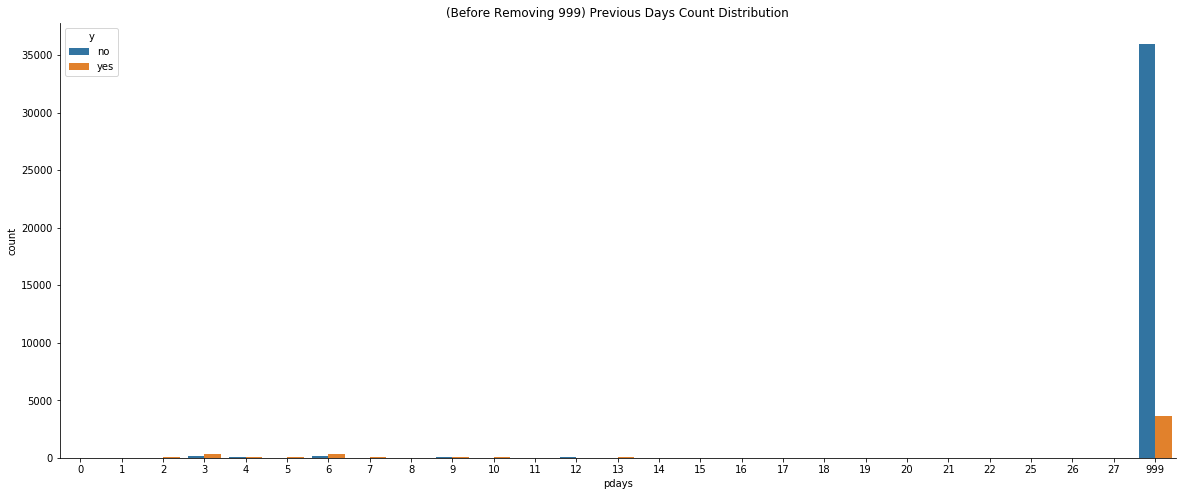

In [44]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(data = data, x = 'pdays', hue = 'y')
ax.set_title('(Before Removing 999) Previous Days Count Distribution')
sns.despine()

In [45]:
data.loc[data['pdays'] == 999, 'pdays'] = np.nan

In [46]:
# Outliers = Q3 + 1.5 * IQR
outliers = data['pdays'].quantile(q = 0.75) + 1.5*(data['pdays'].quantile(q = 0.75) - data['pdays'].quantile(q = 0.25))
print("The previous days (after removing 999) above " + str(outliers) + " days is outliers.")

o = data[data['pdays'] > outliers]['pdays'].count()
n = data.shape[0]
perc_out = round(o*100/n, 2)

print("The number of outliers is " + str(o) + ".")
print("The outliers percentage is " + str(perc_out) + "%.")

The previous days (after removing 999) above 13.0 days is outliers.
The number of outliers is 82.
The outliers percentage is 0.2%.


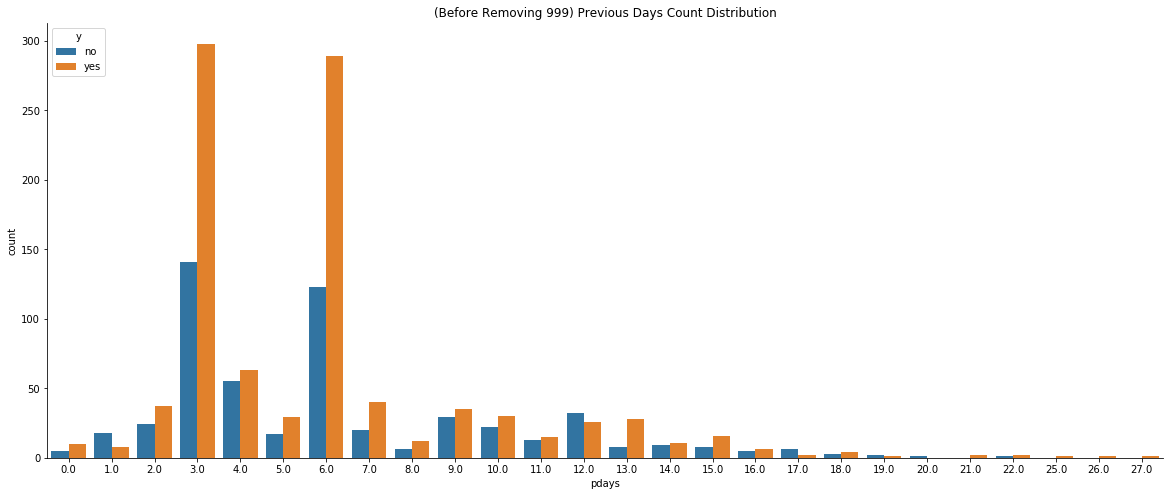

In [47]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(data = data, x = 'pdays', hue = 'y')
ax.set_title('(Before Removing 999) Previous Days Count Distribution')
sns.despine()

#### Previous

In [48]:
other[['previous']].describe()

,previous
count,41176.000000
mean,0.173013
std,0.494964
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,7.000000


The maximum value of previous contact is 7.
<br> The minimum value of previous contact is 0.
<br> The average value of previous contact is 0.17.
<br> The median value of previous contact is 0.
<br> The standard deviation value of previous contact is 0.49.

In [49]:
# Outliers = Q3 + 1.5 * IQR
outliers = other['previous'].quantile(q = 0.75) + 1.5*(other['previous'].quantile(q = 0.75) - other['previous'].quantile(q = 0.25))
print("The previous contact above " + str(outliers) + " is outliers.")

o = other[other['previous'] > outliers]['previous'].count()
n = other.shape[0]
perc_out = round(o*100/n, 2)

print("The number of outliers is " + str(o) + ".")
print("The outliers percentage is " + str(perc_out) + "%.")

The previous contact above 0.0 is outliers.
The number of outliers is 5625.
The outliers percentage is 13.66%.


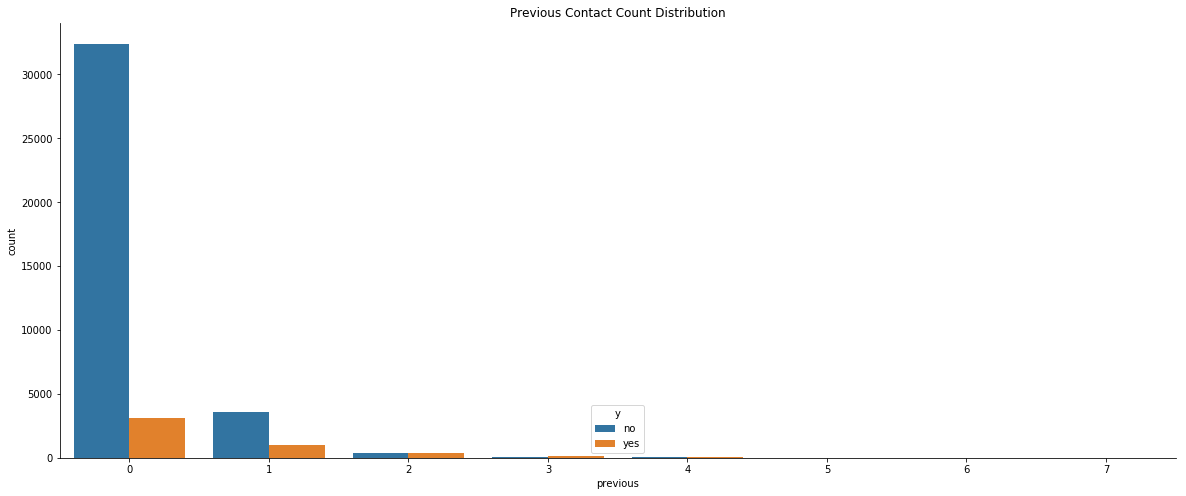

In [50]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(data = data, x = 'previous', hue = 'y')
ax.set_title('Previous Contact Count Distribution')
sns.despine()

#### Poutcome

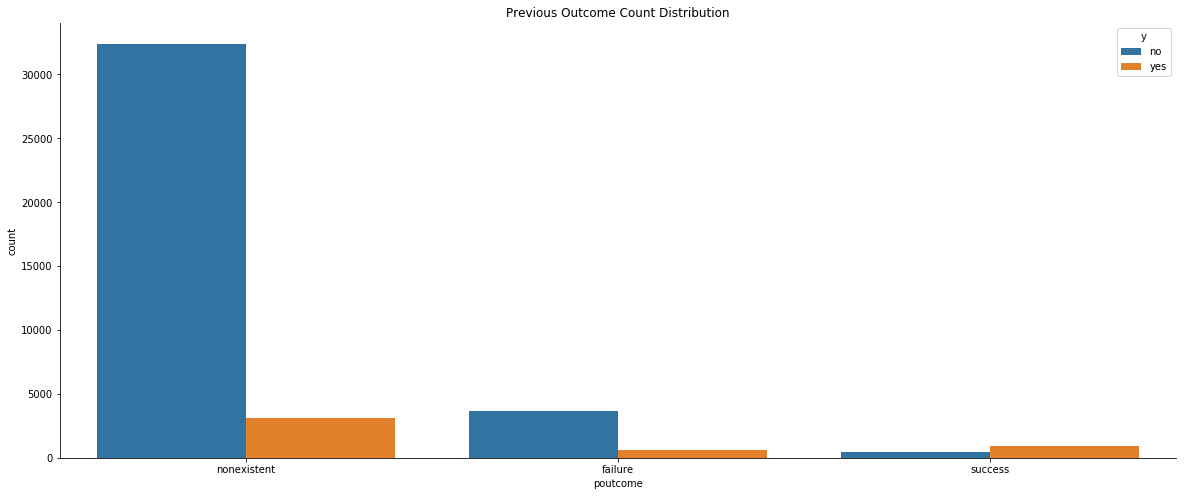

In [51]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(data = data, x = 'poutcome', hue = 'y')
ax.set_title('Previous Outcome Count Distribution')
sns.despine()

## Social and Economic Context Attributes
Forth, we explore social and economic context attributes (emp.var.rate, cons.price.id, cons.conf.idx, euribor3m, and nr.employed).

In [52]:
socec = data.iloc[:, 15:20]
socec.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


### Analysis per attribute

#### Emp.var.rate

In [53]:
socec[['emp.var.rate']].describe()

,emp.var.rate
count,41176.000000
mean,0.081922
std,1.570883
min,-3.400000
25%,-1.800000
50%,1.100000
75%,1.400000
max,1.400000


The maximum value of employment variation rate is 1.4.
<br> The minimum value of employment variation rate is -3.4.
<br> The average value of employment variation rate is 0.082.
<br> The median value of employment variation rate is 1.1.
<br> The standard deviation value of employment variation rate is 1.57.

In [54]:
# Outliers = Q3 + 1.5 * IQR
outliers = socec['emp.var.rate'].quantile(q = 0.75) + 1.5*(socec['emp.var.rate'].quantile(q = 0.75) - socec['emp.var.rate'].quantile(q = 0.25))
print("The employement variation rate above " + str(round(outliers, 2)) + " is outliers.")

o = socec[socec['emp.var.rate'] > outliers]['emp.var.rate'].count()
n = socec.shape[0]
perc_out = round(o*100/n, 2)

print("The number of outliers is " + str(o) + ".")
print("The outliers percentage is " + str(perc_out) + "%.")

The employement variation rate above 6.2 is outliers.
The number of outliers is 0.
The outliers percentage is 0.0%.


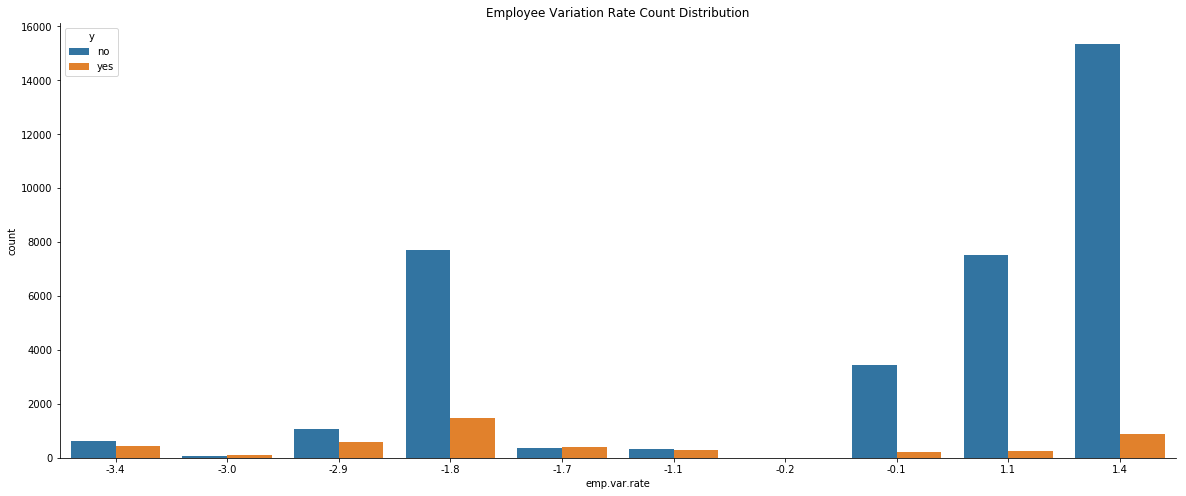

In [55]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(data = data, x = 'emp.var.rate', hue = 'y')
ax.set_title('Employee Variation Rate Count Distribution')
sns.despine()

The highest employee variation rate more likely to say no to the marketing campaign.

#### Cons.price.idx

In [56]:
socec[['cons.price.idx']].describe()

,cons.price.idx
count,41176.000000
mean,93.575720
std,0.578839
min,92.201000
25%,93.075000
50%,93.749000
75%,93.994000
max,94.767000


The maximum value of consumer price index is 94.77.
<br> The minimum value of consumer price index is 92.2.
<br> The average value of consumer price index is 93.58.
<br> The median value of consumer price index is 93.75.
<br> The standard deviation value of consumer price index is 0.58.

In [57]:
# Outliers = Q3 + 1.5 * IQR
outliers = socec['cons.price.idx'].quantile(q = 0.75) + 1.5*(socec['cons.price.idx'].quantile(q = 0.75) - socec['cons.price.idx'].quantile(q = 0.25))
print("The consumer price index above " + str(round(outliers, 2)) + " is outliers.")

o = socec[socec['cons.price.idx'] > outliers]['cons.price.idx'].count()
n = socec.shape[0]
perc_out = round(o*100/n, 2)

print("The number of outliers is " + str(o) + ".")
print("The outliers percentage is " + str(perc_out) + "%.")

The consumer price index above 95.37 is outliers.
The number of outliers is 0.
The outliers percentage is 0.0%.


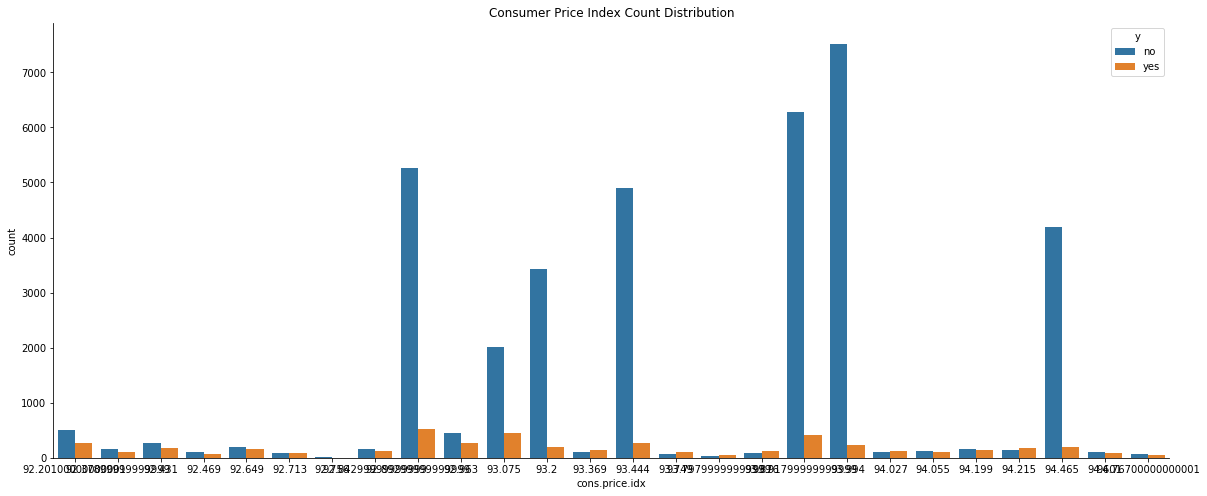

In [58]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(data = data, x = 'cons.price.idx', hue = 'y')
ax.set_title('Consumer Price Index Count Distribution')
sns.despine()

#### Cons.conf.idx

In [59]:
socec[['cons.conf.idx']].describe()

,cons.conf.idx
count,41176.000000
mean,-40.502863
std,4.627860
min,-50.800000
25%,-42.700000
50%,-41.800000
75%,-36.400000
max,-26.900000


The maximum value of consumer confidence index is -26.9.
<br> The minimum value of consumer confidence index is -50.8.
<br> The average value of consumer confidence index is -40.5.
<br> The median value of consumer confidence index is -41.8.
<br> The standard deviation value of consumer confidence index is 4.63.

In [60]:
# Outliers = Q3 + 1.5 * IQR
outliers = socec['cons.conf.idx'].quantile(q = 0.75) + 1.5*(socec['cons.conf.idx'].quantile(q = 0.75) - socec['cons.conf.idx'].quantile(q = 0.25))
print("The consumer confidence index above " + str(round(outliers, 2)) + " is outliers.")

o = socec[socec['cons.conf.idx'] > outliers]['cons.conf.idx'].count()
n = socec.shape[0]
perc_out = round(o*100/n, 2)

print("The number of outliers is " + str(o) + ".")
print("The outliers percentage is " + str(perc_out) + "%.")

The consumer confidence index above -26.95 is outliers.
The number of outliers is 446.
The outliers percentage is 1.08%.


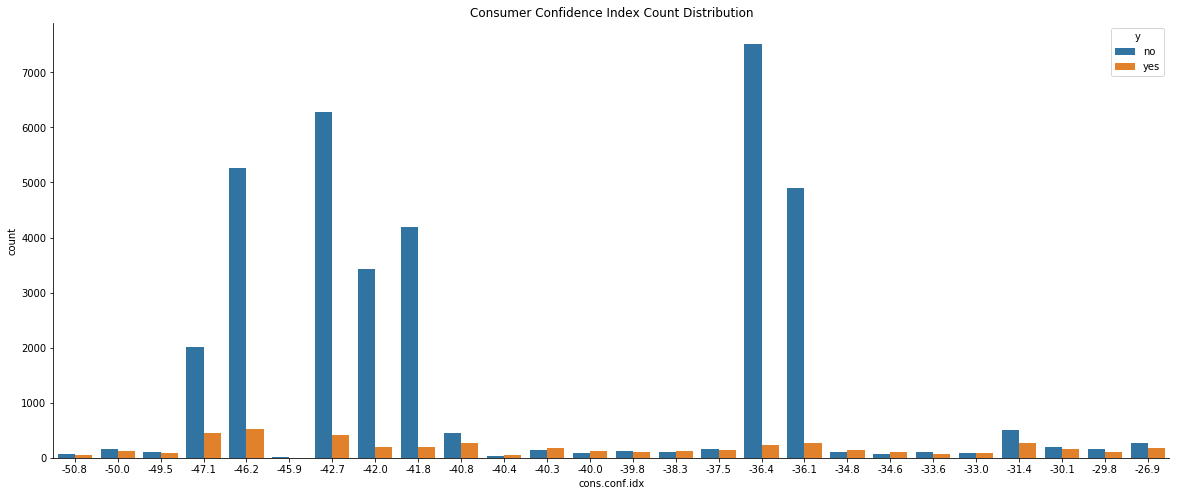

In [61]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(data = data, x = 'cons.conf.idx', hue = 'y')
ax.set_title('Consumer Confidence Index Count Distribution')
sns.despine()

#### Euribor3m

In [62]:
socec[['euribor3m']].describe()

,euribor3m
count,41176.000000
mean,3.621293
std,1.734437
min,0.634000
25%,1.344000
50%,4.857000
75%,4.961000
max,5.045000


The maximum value of  euribor 3 month rate is 5.045.
<br> The minimum value of euribor 3 month rate is 0.634.
<br> The average value of euribor 3 month rate is 3.62.
<br> The median value of euribor 3 month rate is 4.857.
<br> The standard deviation value of euribor 3 month rate is 1.73.

In [63]:
# Outliers = Q3 + 1.5 * IQR
outliers = socec['euribor3m'].quantile(q = 0.75) + 1.5*(socec['euribor3m'].quantile(q = 0.75) - socec['euribor3m'].quantile(q = 0.25))
print("The euribor 3 month rate above " + str(round(outliers, 2)) + " is outliers.")

o = socec[socec['euribor3m'] > outliers]['euribor3m'].count()
n = socec.shape[0]
perc_out = round(o*100/n, 2)

print("The number of outliers is " + str(o) + ".")
print("The outliers percentage is " + str(perc_out) + "%.")

The euribor 3 month rate above 10.39 is outliers.
The number of outliers is 0.
The outliers percentage is 0.0%.


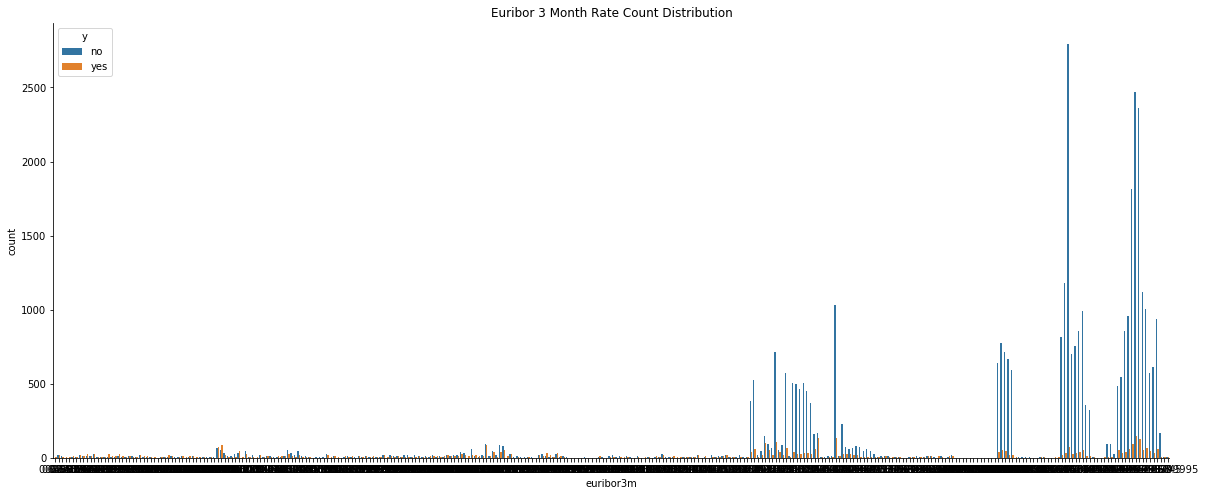

In [64]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(data = data, x = 'euribor3m', hue = 'y')
ax.set_title('Euribor 3 Month Rate Count Distribution')
sns.despine()

#### Nr.employed

In [65]:
socec[['nr.employed']].describe()

,nr.employed
count,41176.000000
mean,5167.034870
std,72.251364
min,4963.600000
25%,5099.100000
50%,5191.000000
75%,5228.100000
max,5228.100000


The maximum value of number of employees is 5228.
<br> The minimum value of number of employees is 4964.
<br> The average value of number of employees is 5167.
<br> The median value of number of employees is 5191.
<br> The standard deviation value of number of employees is 72.25.

In [66]:
# Outliers = Q3 + 1.5 * IQR
outliers = socec['nr.employed'].quantile(q = 0.75) + 1.5*(socec['nr.employed'].quantile(q = 0.75) - socec['nr.employed'].quantile(q = 0.25))
print("The number of employees above " + str(round(outliers, 2)) + " is outliers.")

o = socec[socec['nr.employed'] > outliers]['nr.employed'].count()
n = socec.shape[0]
perc_out = round(o*100/n, 2)

print("The number of outliers is " + str(o) + ".")
print("The outliers percentage is " + str(perc_out) + "%.")

The number of employees above 5421.6 is outliers.
The number of outliers is 0.
The outliers percentage is 0.0%.


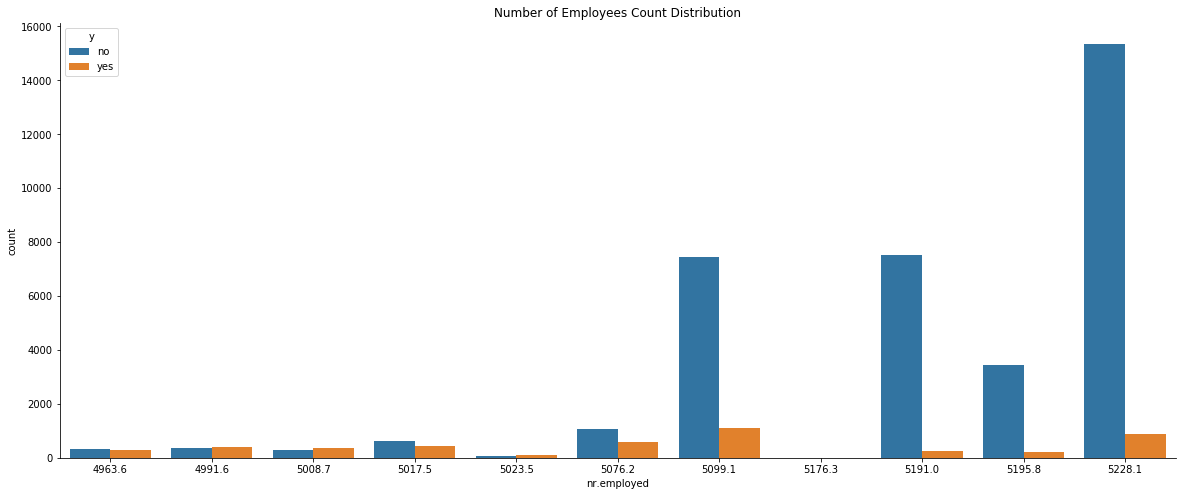

In [67]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(data = data, x = 'nr.employed', hue = 'y')
ax.set_title('Number of Employees Count Distribution')
sns.despine()

The highest number of employees more likely to say no to the campaign.

## Univariate, Bivariate Analysis, and Correlation of Numerical Data

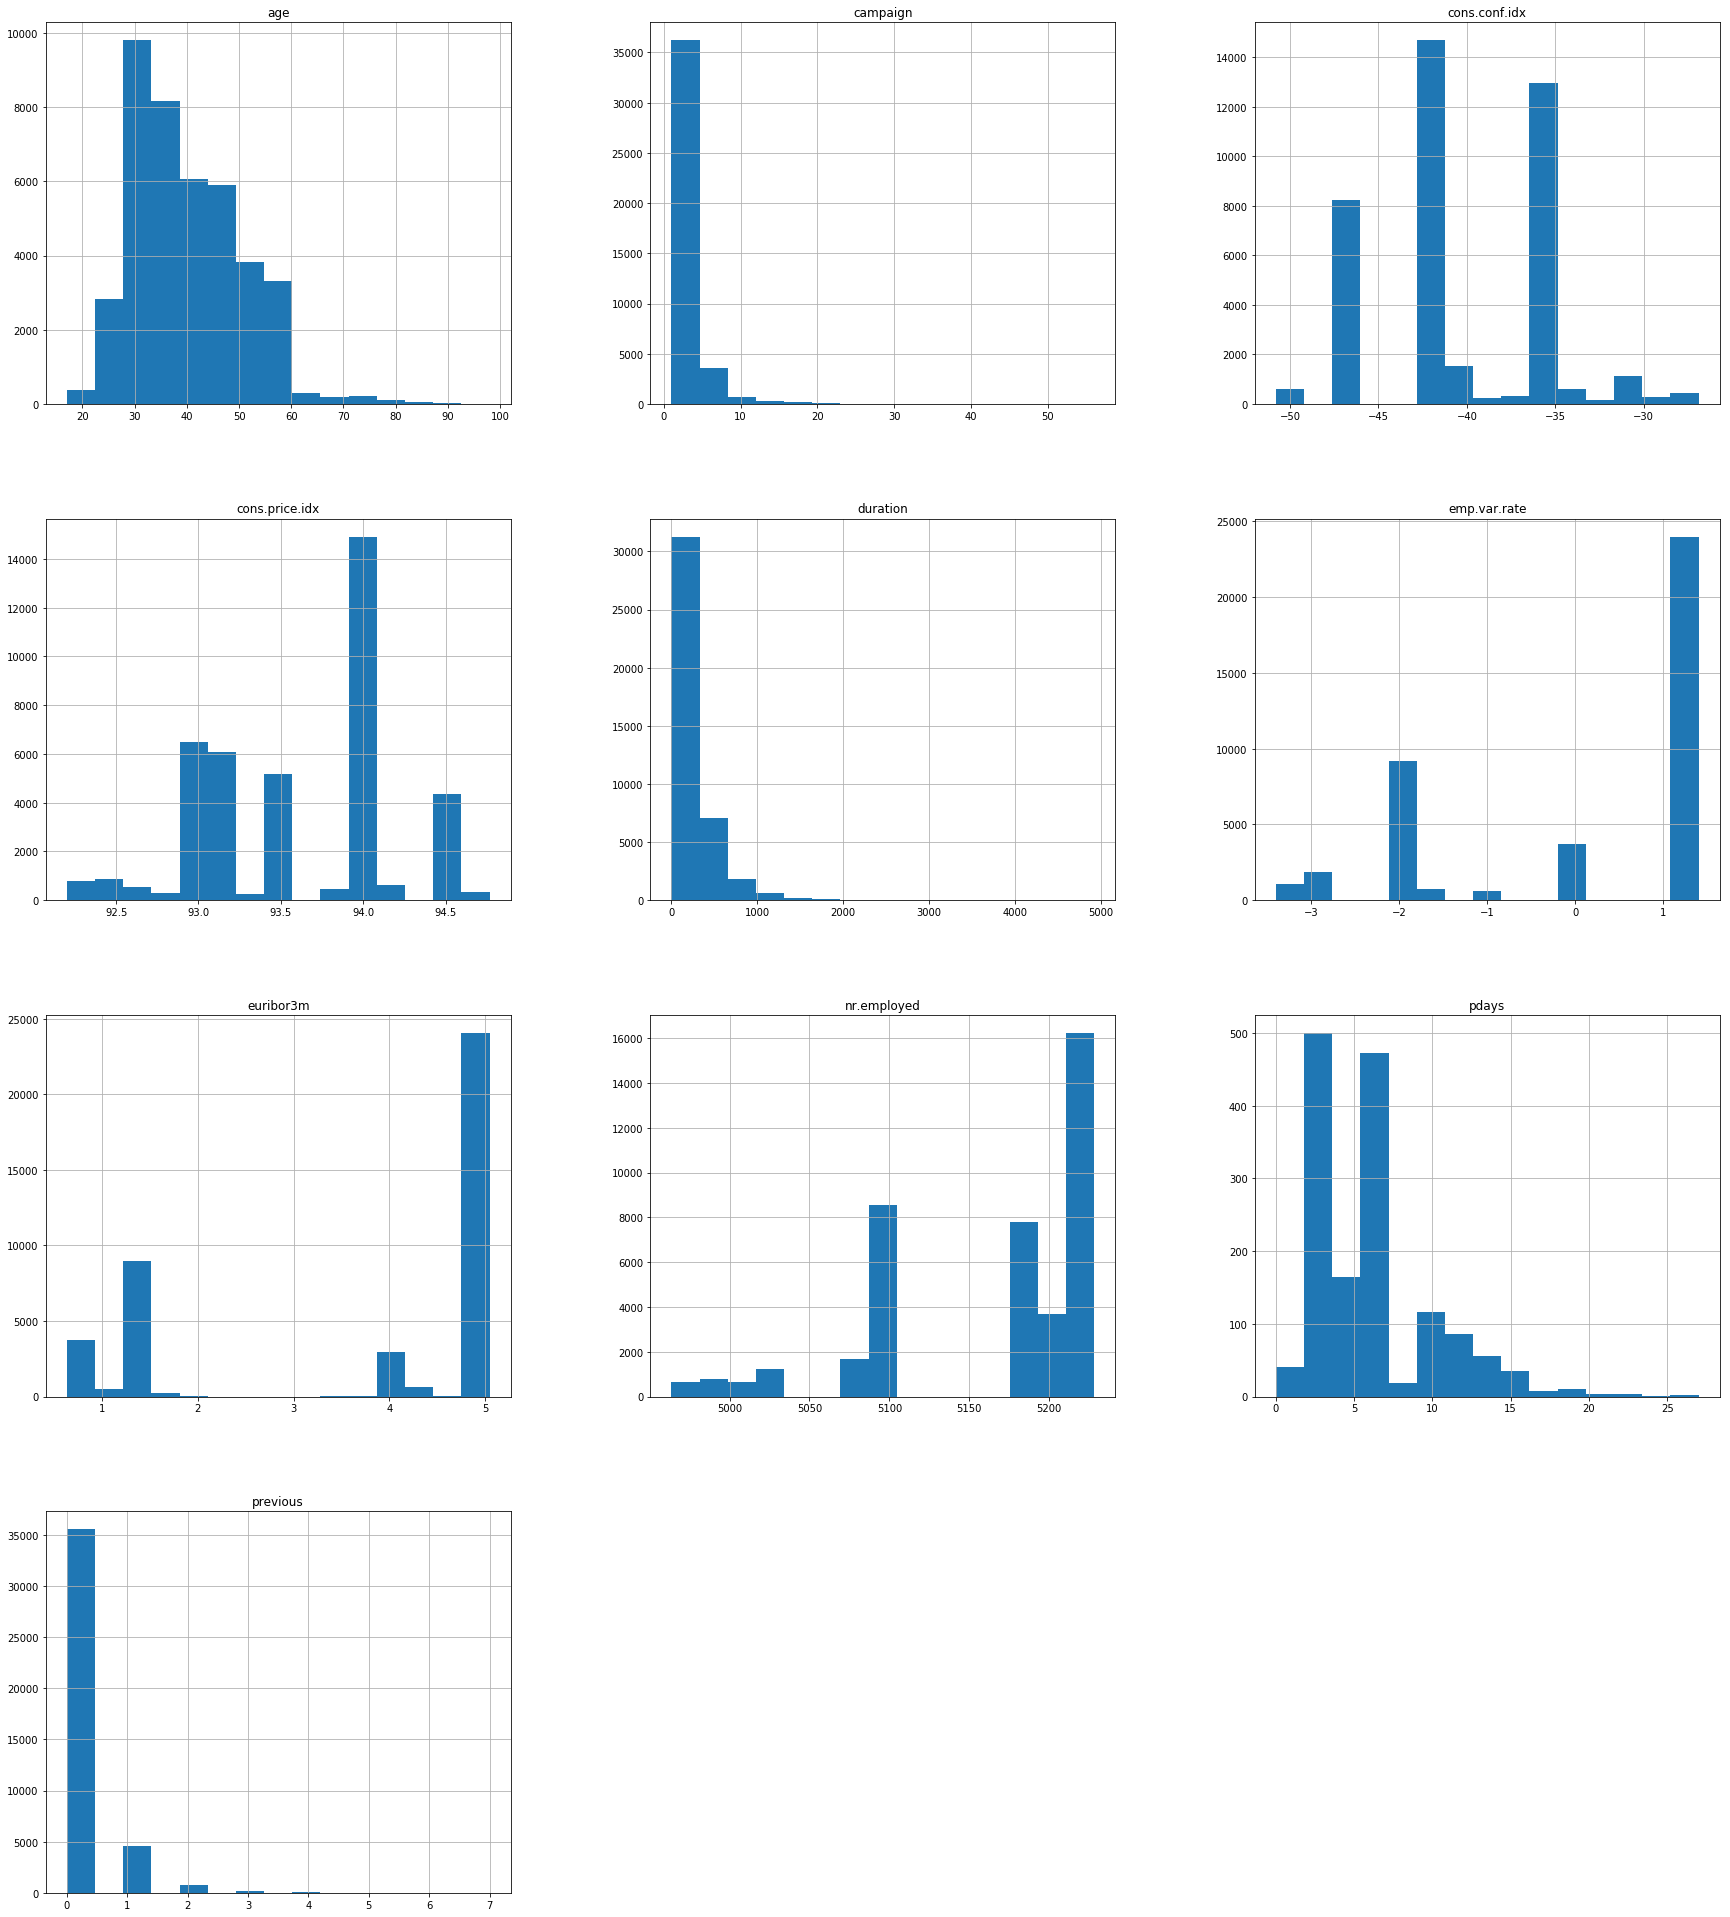

In [72]:
data[numerical_data].hist(bins=15, figsize=(30, 500), layout=(55, 3));

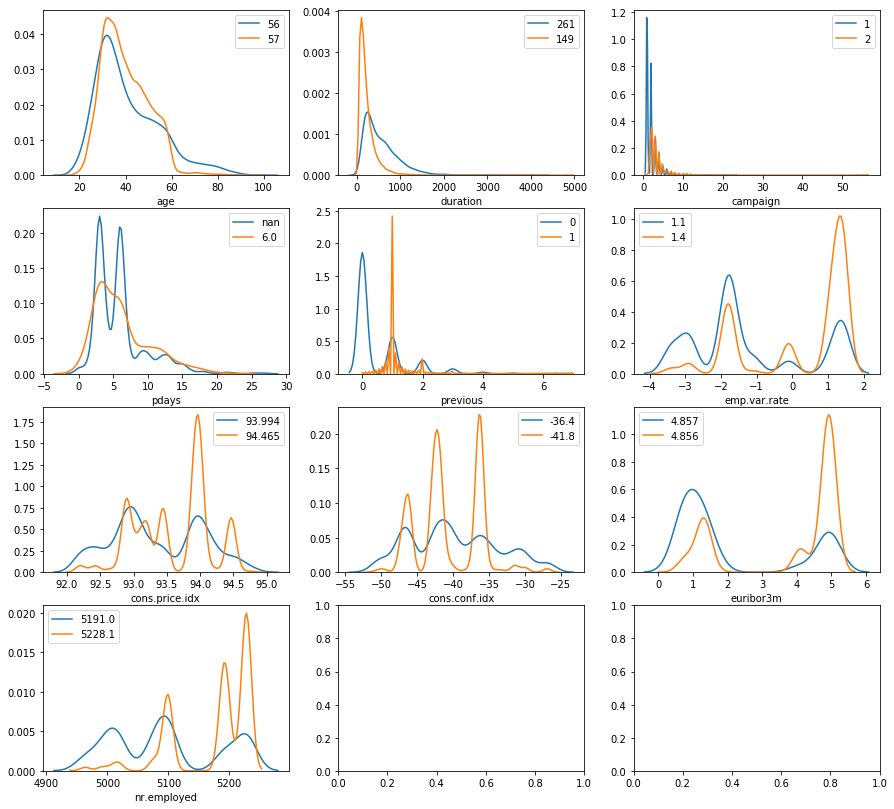

In [68]:
n = math.ceil(len(numerical_data) / 3)
fig, ax = plt.subplots(n, 3, figsize=(15, 3.5*n))
for col, a in zip(numerical_data, ax.reshape(-1)):
    sns.kdeplot(data.loc[data.y == 'yes', col], label = 'buy == yes', ax=a)
    sns.kdeplot(data.loc[data.y == 'no', col], label = 'buy == no', ax=a)
    a.legend(data[col].unique())
    a.set_xlabel(col)

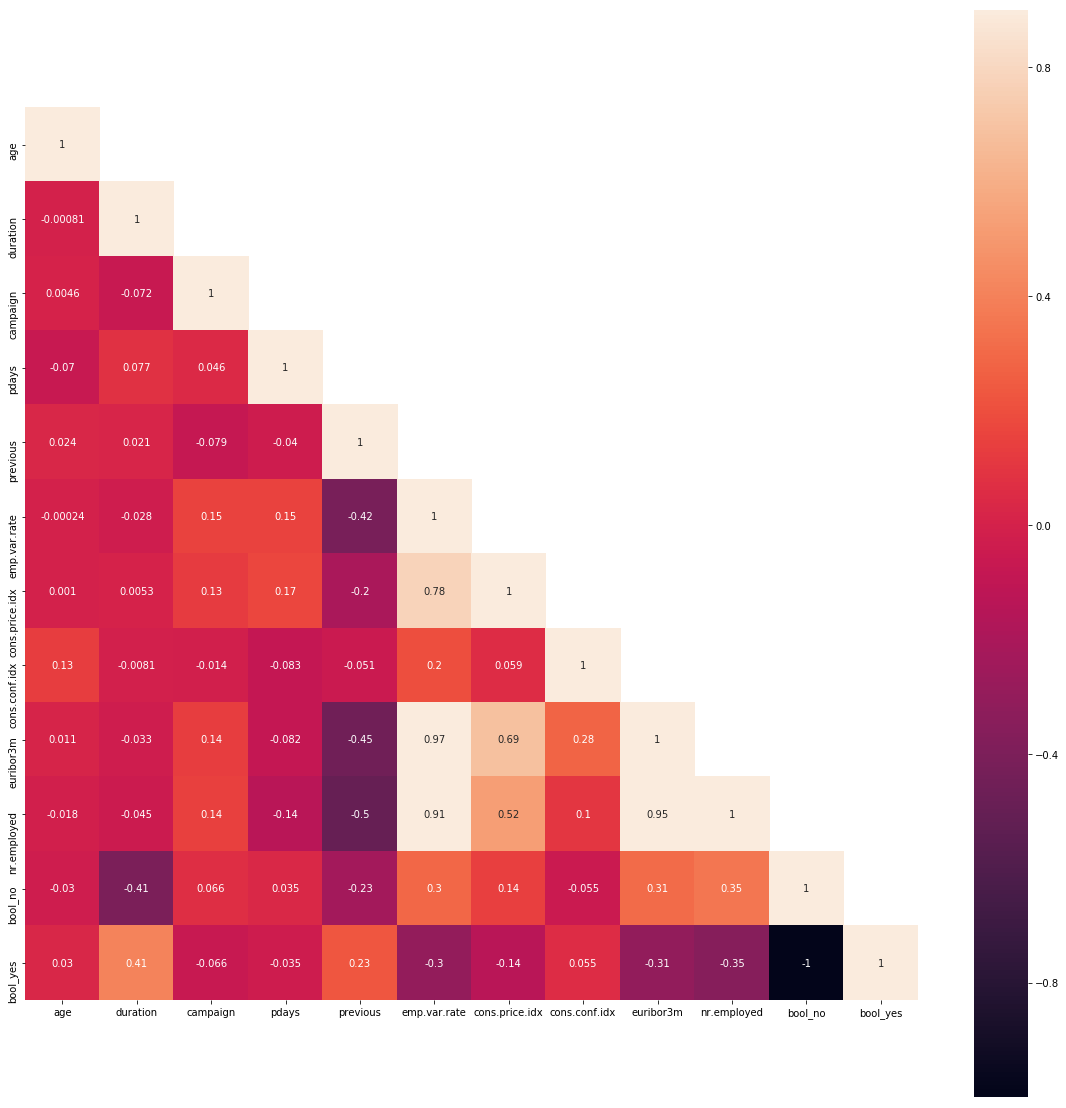

In [78]:
corr = data.corr(method = 'pearson')
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (20,18))
fig.set_size_inches(20,20)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

We need to removed features with high correlation for modelling.

**The data is not good. There are lots thing to do such as binning the numerical data, label or one hot encoding the categorical data, manipulate the unknown data, and encoding the target variable.**